# Lab 6: Clustering

In this assignment, we will learn two clustering methods: K-means and  Agglomerative method. 

Please first study the given example, which applies K-means and Agglomerative method to a toy dataset. 

Based on this example, your task is to apply K-means and Agglomerative method to the heart disease dataset. 


## 1. Example

### 1.1 Generate a toy dataset with two clusters

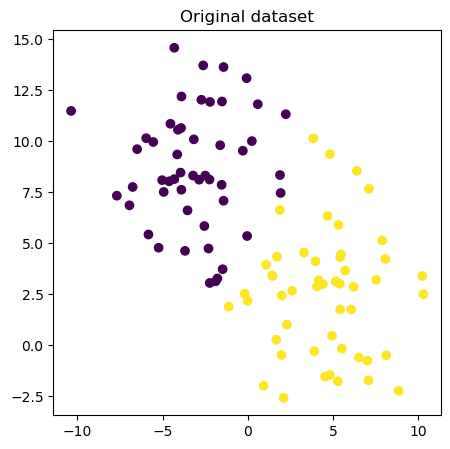

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')


# generate a toy dataset with two clusters
X, y = make_blobs(n_samples=100, n_features=2, centers=2,
                  cluster_std=3.0, random_state=42)
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')
plt.show()

### 1.2 Partition the dataset with K-means 

Here, we use K-means method to partition this toy dataset. Then, to evaluate the clustering performance, we use two methods. The first one is to visualize the partitioned dataset. 

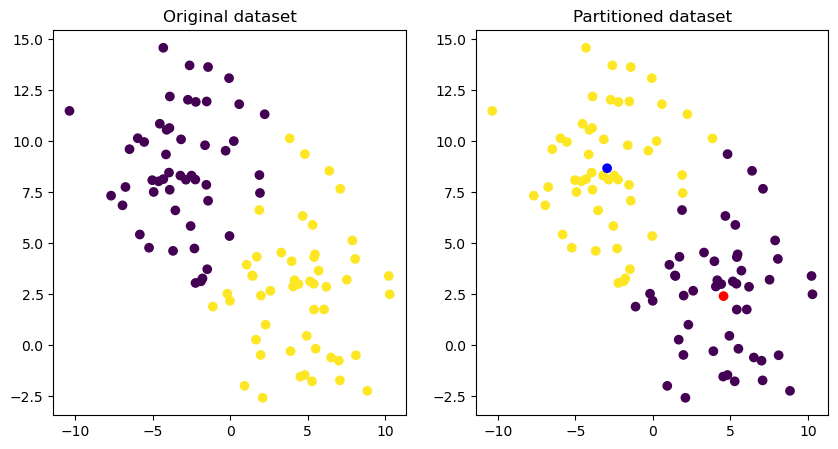

In [3]:
cluster = KMeans(n_clusters=2, random_state=0).fit(X)

centroids = cluster.cluster_centers_  # get the clustering centroids

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
# visualize the clustering centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])
plt.title('Partitioned dataset')

plt.show()

The second method to evaluate the clustering performance is to use [normalized mutual information (NMI)](https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf)
The larger value indicates the better performance. 


In [4]:
from sklearn.metrics.cluster import normalized_mutual_info_score

nmi = normalized_mutual_info_score(
    cluster.labels_, y, average_method='arithmetic')
print(
    'The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

The normalized mutual information score of the K-means method is 0.9291


### 1.3 Partition the dataset with Agglomerative method

Then, we use the Agglomerative method to partition the toy dataset.

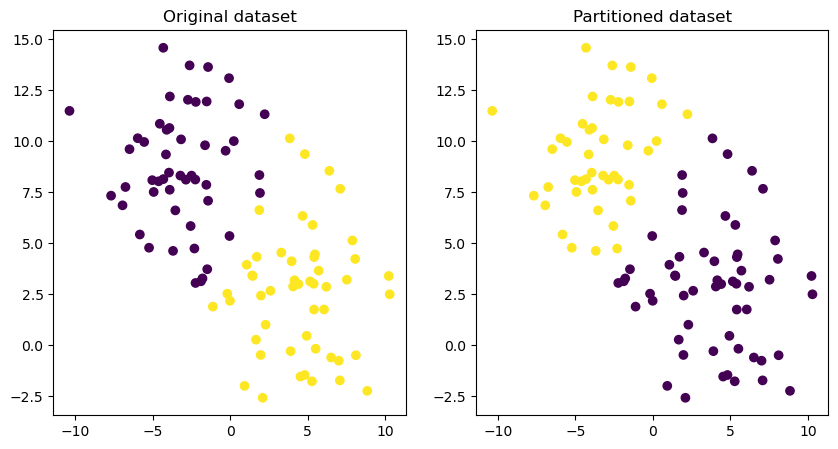

The normalized mutual information score of the Agglomerative method  is 0.6987


In [5]:
cluster = AgglomerativeClustering(n_clusters=2).fit(X)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.title('Partitioned dataset')

plt.show()

nmi = normalized_mutual_info_score(
    cluster.labels_, y, average_method='arithmetic')
print(
    'The normalized mutual information score of the Agglomerative method  is {:.4f}'.format(nmi))

## 2. Task

In this task, we still use the [heart disease](./heart.csv) dataset in Lab Assignment 5. 
Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


**The task is to partition all users into two groups with K-means and Agglomerative methods.**

### 2.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features


In [6]:
# your code
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../Data/heart.csv')
print("#samples: {}, #features: {}".format(df.shape[0], df.shape[1]))

#samples: 303, #features: 14


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.corr().style.background_gradient()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


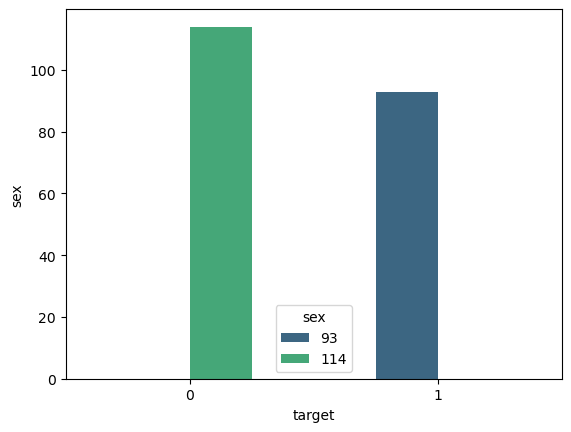

In [9]:
sum__by_credit_score = df.groupby('target')['sex'].sum().reset_index()
sns.barplot(x='target', y='sex', data=sum__by_credit_score, hue='sex',
            palette='viridis', width=.5)
plt.show()

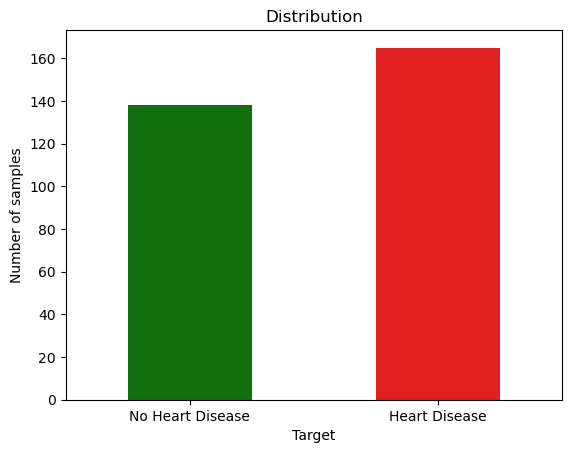

In [10]:
balance_counts = df['target'].value_counts()
balance_counts
sns.barplot(x=balance_counts.index, y=balance_counts.values,
            palette=['green', 'red'], width=.5)
plt.xlabel('Target')
plt.ylabel('Number of samples')
plt.title('Distribution')
plt.xticks(ticks=[0, 1], labels=["No Heart Disease", "Heart Disease"])
plt.show()

In [11]:
X = df.drop('target', axis=1)
y = df['target']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [14]:
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

### 2.2 Partition the dataset with K-means and compute its NMI


In [15]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)


nmi = normalized_mutual_info_score(
    kmeans.labels_, y, average_method='arithmetic')
print(
    'The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

The normalized mutual information score of the K-means method is 0.3262


### 2.3 Partition the dataset with Agglomerative method and compute its NMI


In [16]:
# your code
cluster = AgglomerativeClustering(n_clusters=2).fit(X_scaled)


nmi = normalized_mutual_info_score(
    cluster.labels_, y, average_method='arithmetic')
print(
    'The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

The normalized mutual information score of the K-means method is 0.1979


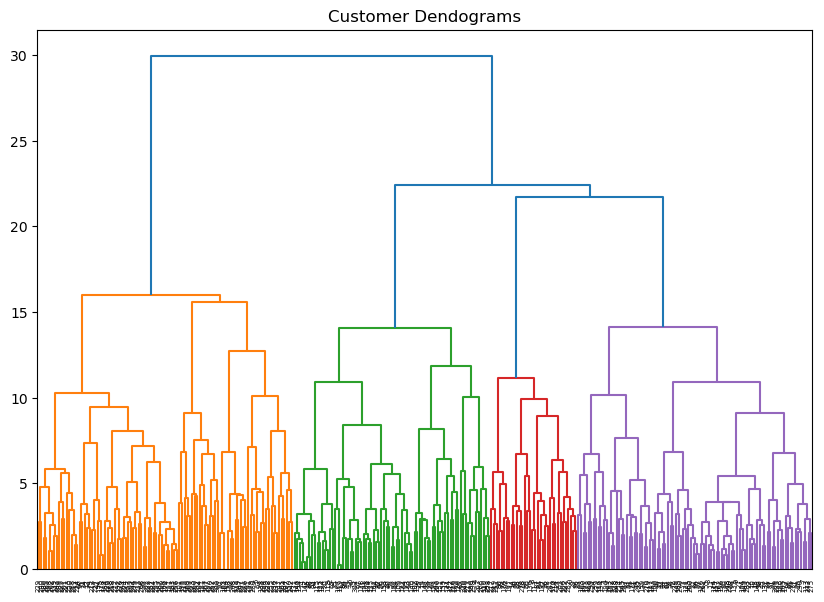

In [18]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))